<a href="https://colab.research.google.com/github/lovnishverma/Python-Getting-Started/blob/main/Beginner_Object_Detection_with_YOLOv8_and_LabelImg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bounding_Box_Annotation_and_Training_YOLOv8

## 🧠 What is Annotation?

**Annotation** in object detection means labeling objects in an image by drawing **bounding boxes** around them and assigning a class label.
This is essential for training models like YOLO, SSD, and Faster R-CNN.

---

## ✍️ Methods of Bounding Box Annotation

You can annotate images in one of the following ways:

### ✅ Recommended Tool-Based Annotation:

1. **[LabelImg](https://github.com/heartexlabs/labelImg)** (Desktop)
2. **[Makesense.ai](https://www.makesense.ai/)** (Online)
3. **[Roboflow Annotate](https://app.roboflow.com/)** (Online, account needed)

---

## 📌 1. **How to Annotate using LabelImg (Easiest for Offline Work)**

### 🔧 Step-by-Step Setup

### ✅ Step 1: Install LabelImg

**Windows:**

* Download Windows .exe from [releases](https://github.com/heartexlabs/labelImg/releases)
  **Linux/macOS/Colab:**

```bash
# You can try this on Colab for GUI with X11 if needed (advanced)
!git clone https://github.com/heartexlabs/labelImg.git
!pip install pyqt5 lxml
%cd labelImg
!make qt5py3
```

---

### ✅ Step 2: Open the Tool

```bash
# Windows:
labelImg.exe
```

### ✅ Step 3: Load Image Folder

* Click: `Open Dir` → select the folder containing images (e.g., `bbox_dataset/images/train`)

---

### ✅ Step 4: Select Save Format

* Menu → **PascalVOC** or **YOLO** format (choose YOLO for object detection)
* Set annotation folder to `bbox_dataset/labels/train`

---

### ✅ Step 5: Annotate

* Click **"Create RectBox"**
* Draw box on object → enter class label (e.g., `dog`, `car`)
* Save using **Ctrl + S** or click Save icon

---

### ✅ Step 6: Annotations are saved as `.txt` files in YOLO format:

Example of `dog.jpg` → `dog.txt`:

```
0 0.512 0.480 0.210 0.320
```

This means:

```
class_id x_center y_center width height  (normalized between 0 and 1)
```

---

## 📌 2. **How to Annotate using Makesense.ai (No Installation Needed)**

### 🌐 Website: [https://www.makesense.ai/](https://www.makesense.ai/)

### Steps:

1. Click "Get Started"
2. Upload your images (can be ZIP or multiple files)
3. Choose **Object Detection**
4. Add your class labels (e.g., `cat`, `bottle`, etc.)
5. Draw bounding boxes
6. Export → Choose **YOLO format**

It downloads `.txt` files and one file per image.

---

## 📌 3. **How to Manually Annotate Inside Jupyter notebook (Drawing Bounding Boxes)**

If you want to draw boxes with mouse inside a notebook using OpenCV (like a mini-LabelImg):

This script only works on your local machine (Python installed, OpenCV installed with GUI support):

```python
import cv2

def draw_box(image_path):
    img = cv2.imread(image_path)
    clone = img.copy()
    bboxes = []

    # ✅ Define these variables in the enclosing scope first
    x_start, y_start = -1, -1
    drawing = False

    def draw(event, x, y, flags, param):
        nonlocal x_start, y_start, drawing

        if event == cv2.EVENT_LBUTTONDOWN:
            x_start, y_start = x, y
            drawing = True

        elif event == cv2.EVENT_LBUTTONUP:
            drawing = False
            x_end, y_end = x, y
            cv2.rectangle(img, (x_start, y_start), (x_end, y_end), (0, 255, 0), 2)
            bboxes.append((x_start, y_start, x_end, y_end))

    cv2.namedWindow("Annotation Tool")
    cv2.setMouseCallback("Annotation Tool", draw)

    print("Press 'q' to finish annotation")
    while True:
        cv2.imshow("Annotation Tool", img)
        key = cv2.waitKey(1) & 0xFF
        if key == ord("q"):
            break

    cv2.destroyAllWindows()
    return bboxes

```

> ⚠️ This works only in local Python, not in Colab due to GUI limitations.

---

## 🔍 Understanding YOLO Annotation Format (very important!)

Each `.txt` file contains **one line per object**:

```
class_id x_center y_center width height
```

All values are **normalized** between `0 and 1` w\.r.t. image dimensions.

Example:

```plaintext
0 0.5 0.5 0.3 0.4
```

This means:

* class\_id = 0 (e.g., 'cat')
* bounding box center is at (50% width, 50% height)
* box size is 30% width × 40% height

---

## 🛠 You can Practice This:

* Annotate 5–10 images using [Makesense.ai](https://www.makesense.ai/)
* Export in YOLO format
* Upload to Colab
* Train YOLOv8 on it


import os
import xml.etree.ElementTree as ET

# Classes in the dataset
CLASSES = ['apple', 'mango']

# Input and output paths
xml_folder = 'annotations_xml'
output_labels = 'labels'

os.makedirs(output_labels, exist_ok=True)

# Function to convert


def convert(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    img_w = int(root.find('size/width').text)
    img_h = int(root.find('size/height').text)

    yolo_lines = []

    for obj in root.findall('object'):
        class_name = obj.find('name').text.lower()
        if class_name not in CLASSES:
            continue

        class_id = CLASSES.index(class_name)

        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)

        # Convert to YOLO format
        x_center = (xmin + xmax) / 2.0 / img_w
        y_center = (ymin + ymax) / 2.0 / img_h
        width = (xmax - xmin) / img_w
        height = (ymax - ymin) / img_h

        yolo_lines.append(
            f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

    return yolo_lines


# Process all XML files
for file in os.listdir(xml_folder):
    if file.endswith(".xml"):
        xml_path = os.path.join(xml_folder, file)
        yolo_data = convert(xml_path)

        txt_filename = file.replace(".xml", ".txt")
        with open(os.path.join(output_labels, txt_filename), "w") as f:
            f.write("\n".join(yolo_data))

print("✅ Conversion completed.")




---



# Custom_Object_Detection_from_Scratch

If you've successfully annotated your mango and apple images using **LabelImg**, and the annotations are saved in **Pascal VOC XML format**

### ✅ Your next steps are:

1. **Convert the Pascal VOC (XML) annotations to YOLO format**
2. **Organize dataset into YOLO folder structure**
3. **Train YOLOv8 on this data using Google Colab**

---

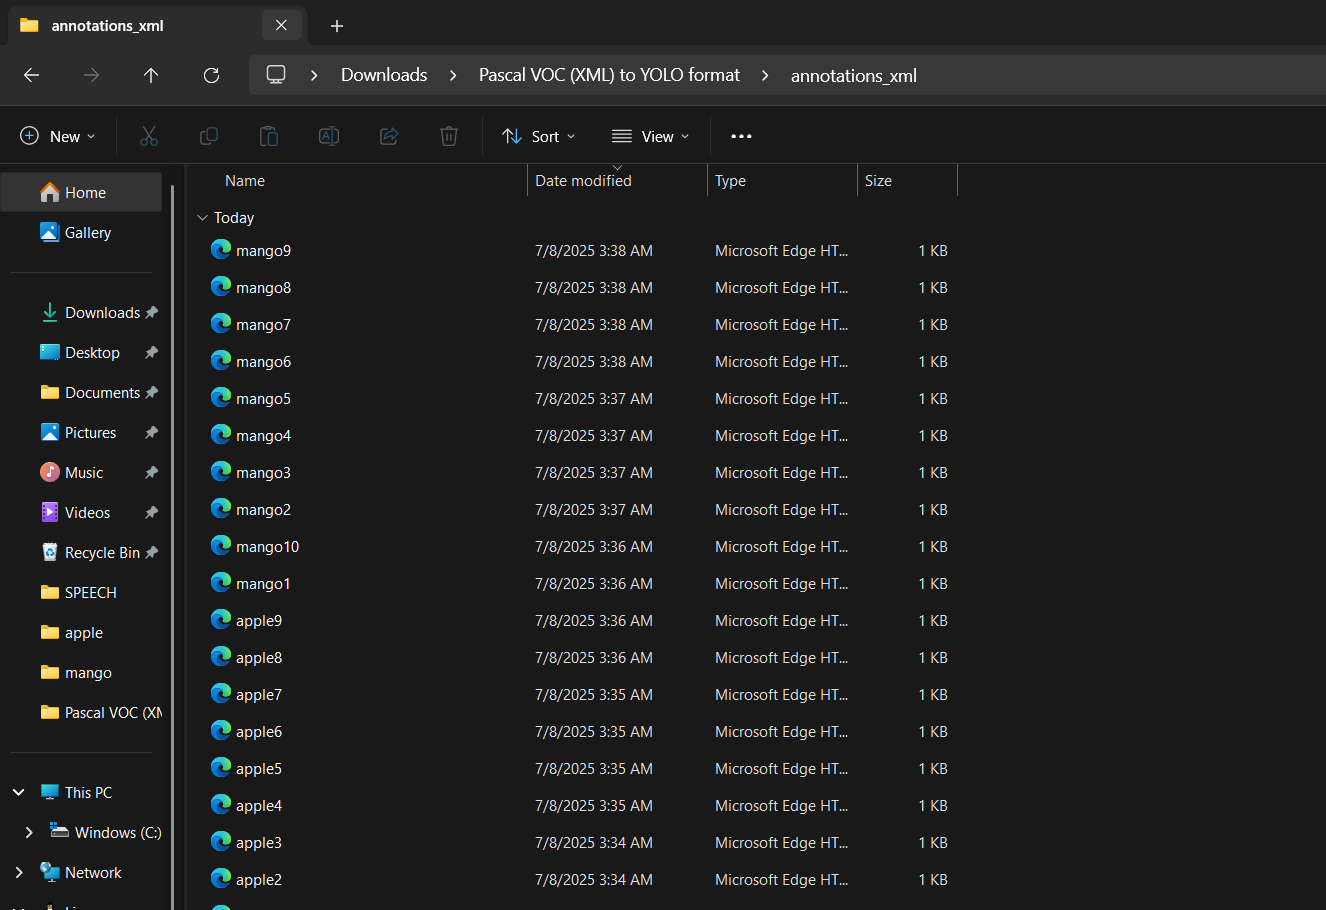

## 🔁 Step 1: Convert Pascal VOC (XML) to YOLO format

Here is a full Python script to convert your XML annotations to YOLO format:

### 🐍 Python Script: `convert_voc_to_yolo.py`

```python
import os
import xml.etree.ElementTree as ET

# Classes in the dataset
CLASSES = ['apple', 'mango']

# Input and output paths
xml_folder = 'annotations_xml'
output_labels = 'labels'

os.makedirs(output_labels, exist_ok=True)

# Function to convert
def convert(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    img_w = int(root.find('size/width').text)
    img_h = int(root.find('size/height').text)

    yolo_lines = []

    for obj in root.findall('object'):
        class_name = obj.find('name').text.lower()
        if class_name not in CLASSES:
            continue

        class_id = CLASSES.index(class_name)

        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)

        # Convert to YOLO format
        x_center = (xmin + xmax) / 2.0 / img_w
        y_center = (ymin + ymax) / 2.0 / img_h
        width = (xmax - xmin) / img_w
        height = (ymax - ymin) / img_h

        yolo_lines.append(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

    return yolo_lines

# Process all XML files
for file in os.listdir(xml_folder):
    if file.endswith(".xml"):
        xml_path = os.path.join(xml_folder, file)
        yolo_data = convert(xml_path)

        txt_filename = file.replace(".xml", ".txt")
        with open(os.path.join(output_labels, txt_filename), "w") as f:
            f.write("\n".join(yolo_data))

print("✅ Conversion completed.")
```

### 🔧 What to do:

1. Put all your `.xml` files in a folder: `annotations_xml/`
2. Run the above script
3. The output `.txt` files (YOLO format) will go into `labels/`

---

## 📁 Step 2: Organize Dataset Folder

You need this structure:

```
YOLO_dataset/
├── images/
│   ├── train/
│   │   ├── apple1.jpg
│   │   ├── mango1.jpg
├── labels/
│   ├── train/
│   │   ├── apple1.txt
│   │   ├── mango1.txt
├── data.yaml
```

---

## 📄 Step 3: Create `data.yaml` File

Create a file `data.yaml` like this:

```yaml
path: /content/YOLO_dataset
train: images/train
val: images/train  # or create a validation split later

names:
  0: apple
  1: mango
```

---

## 🧪 Step 4: Train YOLOv8 in Google Colab

Now upload this to Colab and run the following:

### ▶️ Colab Commands

```python
# 1. Install YOLOv8
!pip install -q ultralytics
from ultralytics import YOLO

# 2. Load YOLOv8 model
model = YOLO("yolov8n.yaml")  # or use yolov8s.yaml

# 3. Train
model.train(data="YOLO_dataset/data.yaml", epochs=20, imgsz=416)
```

---

## 🧪 Step 5: Run Inference on a Test Image

```python
# Inference on one of your test images
results = model.predict(source="YOLO_dataset/images/train/mango9.jpeg", save=True, conf=0.5)
```

This will save prediction images in `runs/detect/predict/`.

---

## 🧳 Optional: Zip for Upload to Colab

You can ZIP your full folder (`YOLO_dataset`) and upload to Colab:

```python
from google.colab import files
uploaded = files.upload()  # upload your zip file
!unzip YOLO_dataset.zip
```

---





---



# **Pascal VOC (XML) to YOLO format**

In [27]:
# import os
# import xml.etree.ElementTree as ET

# # Classes in the dataset
# CLASSES = ['apple', 'mango']

# # Input and output paths
# xml_folder = 'annotations_xml'
# output_labels = 'labels'

# os.makedirs(output_labels, exist_ok=True)

# # Function to convert


# def convert(xml_file):
#     tree = ET.parse(xml_file)
#     root = tree.getroot()

#     img_w = int(root.find('size/width').text)
#     img_h = int(root.find('size/height').text)

#     yolo_lines = []

#     for obj in root.findall('object'):
#         class_name = obj.find('name').text.lower()
#         if class_name not in CLASSES:
#             continue

#         class_id = CLASSES.index(class_name)

#         bndbox = obj.find('bndbox')
#         xmin = int(bndbox.find('xmin').text)
#         ymin = int(bndbox.find('ymin').text)
#         xmax = int(bndbox.find('xmax').text)
#         ymax = int(bndbox.find('ymax').text)

#         # Convert to YOLO format
#         x_center = (xmin + xmax) / 2.0 / img_w
#         y_center = (ymin + ymax) / 2.0 / img_h
#         width = (xmax - xmin) / img_w
#         height = (ymax - ymin) / img_h

#         yolo_lines.append(
#             f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

#     return yolo_lines


# # Process all XML files
# for file in os.listdir(xml_folder):
#     if file.endswith(".xml"):
#         xml_path = os.path.join(xml_folder, file)
#         yolo_data = convert(xml_path)

#         txt_filename = file.replace(".xml", ".txt")
#         with open(os.path.join(output_labels, txt_filename), "w") as f:
#             f.write("\n".join(yolo_data))

# print("Conversion completed.")


# YOLOv8_Tutorial_Apple_vs_Mango

# upload and unzip dataset

In [28]:
# from google.colab import files
# uploaded = files.upload()  # upload your zip file
!unzip YOLO_dataset.zip


Archive:  YOLO_dataset.zip
   creating: YOLO_dataset/
  inflating: YOLO_dataset/data.yaml  
   creating: YOLO_dataset/images/
   creating: YOLO_dataset/images/train/
  inflating: YOLO_dataset/images/train/apple1.jpeg  
  inflating: YOLO_dataset/images/train/apple10.jpeg  
  inflating: YOLO_dataset/images/train/apple2.jpeg  
  inflating: YOLO_dataset/images/train/apple3.jpeg  
  inflating: YOLO_dataset/images/train/apple4.jpeg  
  inflating: YOLO_dataset/images/train/apple5.jpeg  
  inflating: YOLO_dataset/images/train/apple6.jpeg  
  inflating: YOLO_dataset/images/train/apple7.jpeg  
  inflating: YOLO_dataset/images/train/apple8.jpeg  
  inflating: YOLO_dataset/images/train/apple9.jpeg  
  inflating: YOLO_dataset/images/train/mango1.jpeg  
  inflating: YOLO_dataset/images/train/mango10.jpeg  
  inflating: YOLO_dataset/images/train/mango2.jpeg  
  inflating: YOLO_dataset/images/train/mango3.jpeg  
  inflating: YOLO_dataset/images/train/mango4.jpeg  
  inflating: YOLO_dataset/images/trai

check annotation

In [29]:
!head YOLO_dataset/labels/train/mango9.txt


1 0.500000 0.598361 0.607273 0.508197

# Show your image and label

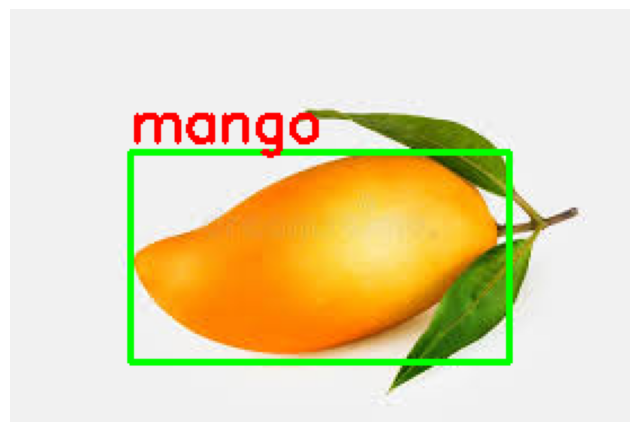

In [30]:
import cv2
import matplotlib.pyplot as plt

def show_yolo_label(img_path, label_path, class_names=["apple", "mango"]):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    with open(label_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        cls, x, y, bw, bh = map(float, line.strip().split())
        x1 = int((x - bw/2) * w)
        y1 = int((y - bh/2) * h)
        x2 = int((x + bw/2) * w)
        y2 = int((y + bh/2) * h)

        label = class_names[int(cls)]
        cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
        cv2.putText(img, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,0,0), 2)

    plt.figure(figsize=(8,6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Show your image and label
show_yolo_label("YOLO_dataset/images/train/mango9.jpeg", "YOLO_dataset/labels/train/mango9.txt")


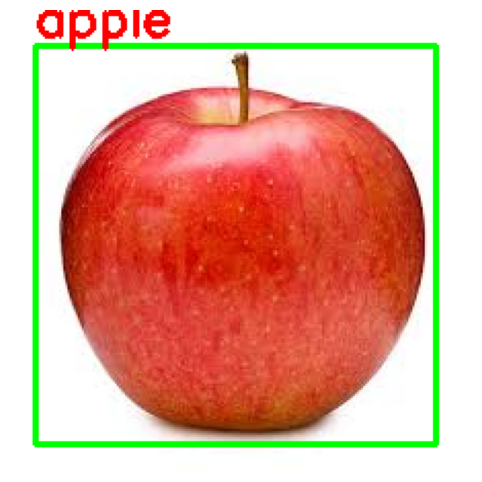

In [31]:
import cv2
import matplotlib.pyplot as plt

def show_yolo_label(img_path, label_path, class_names=["apple", "appleN"]):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    with open(label_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        cls, x, y, bw, bh = map(float, line.strip().split())
        x1 = int((x - bw/2) * w)
        y1 = int((y - bh/2) * h)
        x2 = int((x + bw/2) * w)
        y2 = int((y + bh/2) * h)

        label = class_names[int(cls)]
        cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
        cv2.putText(img, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,0,0), 2)

    plt.figure(figsize=(8,6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Show your image and label
show_yolo_label("YOLO_dataset/images/train/apple9.jpeg", "YOLO_dataset/labels/train/apple9.txt")


# Train Model

In [32]:
# Step 1: Install Ultralytics
!pip install -q ultralytics
from ultralytics import YOLO
from IPython.display import Image

# Step 2: Load Pretrained Model (Transfer Learning)
model = YOLO("yolov8n.pt")  # use pretrained weights instead of training from scratch

# Step 3: Train with Enhanced Config
results = model.train(
    data="YOLO_dataset/data.yaml",   # path to data config
    epochs=200,                      # more epochs for small dataset
    imgsz=416,                       # standard YOLO input size
    batch=4,                         # small batch size for low GPU/RAM
    patience=20,                     # early stopping patience
    name="mango_apple_detector",     # custom run name
    save=True,                       # save final and best models
    save_period=10,                  # save checkpoint every 10 epochs
    cache=True,                      # cache images in memory for speed
    project="runs/train",            # output directory
    val=True,                        # run validation at end of every epoch
    verbose=True                     # show progress
)


Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=YOLO_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=mango_apple_detector2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12.0, pr

100%|██████████| 755k/755k [00:00<00:00, 117MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,238 parameters, 3,011,222 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 312MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 165.1±101.5 MB/s, size: 5.0 KB)


train: Scanning /content/YOLO_dataset/labels/train... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 2466.15it/s]

train: New cache created: /content/YOLO_dataset/labels/train.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



train: Caching images (0.0GB RAM): 100%|██████████| 20/20 [00:00<00:00, 1026.37it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 137.1±42.6 MB/s, size: 4.5 KB)


val: Scanning /content/YOLO_dataset/labels/train.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.0GB RAM): 100%|██████████| 20/20 [00:00<00:00, 459.77it/s]


Plotting labels to runs/train/mango_apple_detector2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/train/mango_apple_detector2
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      0.27G       0.95      2.725      1.264         12        416: 100%|██████████| 5/5 [00:01<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]

                   all         20         20    0.00424          1      0.451       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200     0.316G     0.9524      2.715      1.255         13        416: 100%|██████████| 5/5 [00:00<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.85it/s]

                   all         20         20    0.00366          1      0.587      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200     0.334G      0.826      2.615      1.256         14        416: 100%|██████████| 5/5 [00:00<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.47it/s]

                   all         20         20    0.00352          1      0.595      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200     0.334G     0.9824      2.555      1.303         11        416: 100%|██████████| 5/5 [00:00<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.82it/s]


                   all         20         20    0.00335          1       0.55      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200     0.334G     0.9355      2.239      1.328         15        416: 100%|██████████| 5/5 [00:00<00:00, 11.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.11it/s]

                   all         20         20    0.00342          1      0.605       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200     0.334G     0.8889      2.096      1.279          8        416: 100%|██████████| 5/5 [00:00<00:00, 12.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.18it/s]

                   all         20         20    0.00346          1      0.601      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200     0.334G     0.8509       1.86      1.326         13        416: 100%|██████████| 5/5 [00:00<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.13it/s]

                   all         20         20      0.493        0.5      0.582       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200     0.334G     0.9694      2.019       1.39          9        416: 100%|██████████| 5/5 [00:00<00:00, 13.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.73it/s]

                   all         20         20      0.493        0.5      0.582       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200     0.352G      1.071       1.88      1.435         14        416: 100%|██████████| 5/5 [00:00<00:00, 12.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.41it/s]

                   all         20         20      0.466        0.6        0.6      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200     0.352G     0.8557      1.488      1.303         11        416: 100%|██████████| 5/5 [00:00<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.19it/s]

                   all         20         20       0.41       0.75      0.666      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200     0.352G     0.9423      1.596      1.284          8        416: 100%|██████████| 5/5 [00:00<00:00, 13.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.09it/s]

                   all         20         20       0.41       0.75      0.666      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200     0.352G     0.8151      1.716      1.242         10        416: 100%|██████████| 5/5 [00:00<00:00, 11.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.68it/s]

                   all         20         20      0.409       0.65      0.759       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200     0.367G     0.8151      1.601      1.194         16        416: 100%|██████████| 5/5 [00:00<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.22it/s]

                   all         20         20      0.409       0.65      0.759       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200     0.369G     0.9533      1.511      1.314         14        416: 100%|██████████| 5/5 [00:00<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.27it/s]


                   all         20         20      0.409       0.65      0.759       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200     0.369G     0.7796      1.384      1.224          8        416: 100%|██████████| 5/5 [00:00<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.07it/s]

                   all         20         20      0.857      0.947      0.962      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200     0.369G     0.8646      1.309      1.236          9        416: 100%|██████████| 5/5 [00:00<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.93it/s]

                   all         20         20      0.857      0.947      0.962      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200     0.369G     0.8778      1.242      1.266          9        416: 100%|██████████| 5/5 [00:00<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.74it/s]


                   all         20         20      0.857      0.947      0.962      0.751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200     0.385G     0.9583      1.334      1.313         12        416: 100%|██████████| 5/5 [00:00<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.59it/s]

                   all         20         20      0.961      0.691      0.969      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200     0.402G     0.9348      1.356      1.193         10        416: 100%|██████████| 5/5 [00:00<00:00, 13.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.28it/s]

                   all         20         20      0.961      0.691      0.969      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200     0.402G     0.8904      1.176       1.23         15        416: 100%|██████████| 5/5 [00:00<00:00, 12.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.86it/s]

                   all         20         20      0.961      0.691      0.969      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200     0.402G     0.8463       1.23      1.283          7        416: 100%|██████████| 5/5 [00:00<00:00, 12.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.69it/s]

                   all         20         20      0.973       0.94      0.983      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200     0.402G     0.8731      1.188      1.246         13        416: 100%|██████████| 5/5 [00:00<00:00, 12.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.58it/s]

                   all         20         20      0.973       0.94      0.983      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200     0.418G     0.9078      1.091      1.321         12        416: 100%|██████████| 5/5 [00:00<00:00, 12.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.36it/s]

                   all         20         20      0.973       0.94      0.983      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200     0.436G     0.8202      1.129       1.21         11        416: 100%|██████████| 5/5 [00:00<00:00, 12.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.96it/s]

                   all         20         20      0.654          1      0.935      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200     0.436G     0.8406      1.097      1.206         14        416: 100%|██████████| 5/5 [00:00<00:00, 12.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.49it/s]

                   all         20         20      0.654          1      0.935      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200     0.436G      0.908      1.115      1.263         13        416: 100%|██████████| 5/5 [00:00<00:00, 12.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.93it/s]

                   all         20         20      0.654          1      0.935      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200     0.436G     0.8983      1.224      1.267         14        416: 100%|██████████| 5/5 [00:00<00:00, 12.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.42it/s]


                   all         20         20      0.706      0.923      0.949      0.751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200     0.453G     0.8543      1.189      1.175         11        416: 100%|██████████| 5/5 [00:00<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.20it/s]

                   all         20         20      0.706      0.923      0.949      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200     0.453G     0.7845      1.045       1.16         13        416: 100%|██████████| 5/5 [00:00<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.14it/s]

                   all         20         20      0.706      0.923      0.949      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200     0.453G     0.8213       1.05        1.2         10        416: 100%|██████████| 5/5 [00:00<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.23it/s]

                   all         20         20      0.715       0.85       0.85      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200     0.453G      0.852       1.12      1.184         16        416: 100%|██████████| 5/5 [00:00<00:00, 13.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.76it/s]

                   all         20         20      0.715       0.85       0.85      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200     0.453G      0.856      1.074      1.221         10        416: 100%|██████████| 5/5 [00:00<00:00, 13.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.63it/s]

                   all         20         20      0.715       0.85       0.85      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200     0.453G     0.8682      1.199       1.21          6        416: 100%|██████████| 5/5 [00:00<00:00, 13.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.07it/s]

                   all         20         20      0.715       0.85       0.85      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200     0.453G     0.8561      1.057      1.188         12        416: 100%|██████████| 5/5 [00:00<00:00, 12.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.31it/s]

                   all         20         20      0.918          1       0.99      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200     0.453G     0.7803      1.068      1.167          7        416: 100%|██████████| 5/5 [00:00<00:00, 11.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.58it/s]

                   all         20         20      0.918          1       0.99      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200     0.453G     0.8279      1.018      1.166         12        416: 100%|██████████| 5/5 [00:00<00:00, 13.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.91it/s]

                   all         20         20      0.918          1       0.99      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200     0.453G     0.7718     0.9731      1.162          8        416: 100%|██████████| 5/5 [00:00<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.82it/s]

                   all         20         20      0.917          1      0.995      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200     0.453G     0.7714      1.023       1.16         10        416: 100%|██████████| 5/5 [00:00<00:00, 12.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.38it/s]

                   all         20         20      0.917          1      0.995      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200     0.453G     0.7506     0.9297      1.161         10        416: 100%|██████████| 5/5 [00:00<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.98it/s]

                   all         20         20      0.917          1      0.995      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200     0.453G     0.6864     0.8938      1.098         11        416: 100%|██████████| 5/5 [00:00<00:00, 11.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.44it/s]

                   all         20         20      0.984          1      0.995       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200     0.453G     0.7209      1.088      1.072         15        416: 100%|██████████| 5/5 [00:00<00:00, 12.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.27it/s]


                   all         20         20      0.984          1      0.995       0.81

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200     0.453G     0.7298       1.01       1.22         14        416: 100%|██████████| 5/5 [00:00<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.95it/s]

                   all         20         20      0.984          1      0.995       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200     0.453G     0.8429      1.145      1.177         13        416: 100%|██████████| 5/5 [00:00<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.03it/s]

                   all         20         20      0.993          1      0.995      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200     0.453G     0.8029     0.9809      1.195         13        416: 100%|██████████| 5/5 [00:00<00:00,  9.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.21it/s]


                   all         20         20      0.993          1      0.995      0.768

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200     0.453G     0.8096     0.9381      1.225          8        416: 100%|██████████| 5/5 [00:00<00:00, 12.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.54it/s]

                   all         20         20      0.993          1      0.995      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200     0.453G     0.8559      1.056      1.204          8        416: 100%|██████████| 5/5 [00:00<00:00, 11.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.45it/s]

                   all         20         20      0.898       0.95       0.97      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200     0.453G     0.8467     0.9528      1.205         11        416: 100%|██████████| 5/5 [00:00<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.95it/s]

                   all         20         20      0.898       0.95       0.97      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200     0.453G     0.7915     0.9784      1.155          8        416: 100%|██████████| 5/5 [00:00<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.11it/s]

                   all         20         20      0.898       0.95       0.97      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200     0.453G     0.8688     0.9474      1.309         11        416: 100%|██████████| 5/5 [00:00<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.59it/s]

                   all         20         20      0.898       0.95       0.97      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200     0.453G     0.6934     0.8326      1.087          9        416: 100%|██████████| 5/5 [00:00<00:00, 11.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.45it/s]


                   all         20         20      0.845       0.95      0.946      0.822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200     0.453G     0.8654       1.09      1.224         10        416: 100%|██████████| 5/5 [00:00<00:00, 13.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.36it/s]

                   all         20         20      0.845       0.95      0.946      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200     0.453G     0.7896     0.9002      1.186          9        416: 100%|██████████| 5/5 [00:00<00:00, 13.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.67it/s]

                   all         20         20      0.845       0.95      0.946      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200     0.453G     0.7605      1.115      1.184         13        416: 100%|██████████| 5/5 [00:00<00:00, 12.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.26it/s]

                   all         20         20      0.943       0.95      0.978      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200     0.453G     0.8185     0.9243      1.178         10        416: 100%|██████████| 5/5 [00:00<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.99it/s]

                   all         20         20      0.943       0.95      0.978      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200     0.453G     0.6822      0.843      1.085         11        416: 100%|██████████| 5/5 [00:00<00:00, 11.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.57it/s]


                   all         20         20      0.943       0.95      0.978      0.852

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200     0.453G     0.7985     0.9941      1.233          7        416: 100%|██████████| 5/5 [00:00<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.96it/s]

                   all         20         20      0.967          1      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200     0.453G     0.6575     0.8829      1.101          6        416: 100%|██████████| 5/5 [00:00<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.34it/s]

                   all         20         20      0.967          1      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200     0.453G     0.7027     0.8116      1.096         13        416: 100%|██████████| 5/5 [00:00<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.10it/s]

                   all         20         20      0.967          1      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200     0.453G     0.6824     0.8778      1.102         14        416: 100%|██████████| 5/5 [00:00<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.56it/s]


                   all         20         20      0.895          1      0.995      0.852

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200     0.453G      0.794     0.9067      1.222         11        416: 100%|██████████| 5/5 [00:00<00:00, 13.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.39it/s]

                   all         20         20      0.895          1      0.995      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200     0.453G     0.8924      1.011      1.305         12        416: 100%|██████████| 5/5 [00:00<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.82it/s]

                   all         20         20      0.895          1      0.995      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200     0.453G     0.6262     0.7156      1.065         14        416: 100%|██████████| 5/5 [00:00<00:00, 11.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.35it/s]

                   all         20         20      0.945      0.994      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200     0.453G        0.6      0.818      1.059          9        416: 100%|██████████| 5/5 [00:00<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.90it/s]

                   all         20         20      0.945      0.994      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200     0.453G     0.6442     0.8355       1.09         11        416: 100%|██████████| 5/5 [00:00<00:00, 13.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.28it/s]

                   all         20         20      0.945      0.994      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200     0.453G      0.745     0.8528      1.138          8        416: 100%|██████████| 5/5 [00:00<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.06it/s]

                   all         20         20      0.945      0.994      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200     0.453G     0.8742     0.9621      1.244         11        416: 100%|██████████| 5/5 [00:00<00:00, 12.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.92it/s]

                   all         20         20      0.925          1      0.995      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200     0.453G     0.5832     0.8449       1.06         13        416: 100%|██████████| 5/5 [00:00<00:00, 10.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.37it/s]

                   all         20         20      0.925          1      0.995      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200     0.453G     0.6208     0.7882      1.134         12        416: 100%|██████████| 5/5 [00:00<00:00, 12.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.03it/s]

                   all         20         20      0.925          1      0.995      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200     0.453G     0.8355     0.9276      1.214         10        416: 100%|██████████| 5/5 [00:00<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.28it/s]


                   all         20         20      0.935          1       0.99      0.861

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200     0.453G      0.703     0.8369      1.116          8        416: 100%|██████████| 5/5 [00:00<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.65it/s]

                   all         20         20      0.935          1       0.99      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200     0.453G      0.859     0.9556      1.197          9        416: 100%|██████████| 5/5 [00:00<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.15it/s]

                   all         20         20      0.935          1       0.99      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200     0.453G     0.6882     0.9153      1.131         16        416: 100%|██████████| 5/5 [00:00<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.86it/s]

                   all         20         20      0.985      0.998      0.995      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200     0.453G     0.8006     0.8263      1.143          7        416: 100%|██████████| 5/5 [00:00<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.55it/s]

                   all         20         20      0.985      0.998      0.995      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200     0.453G     0.6539     0.8085      1.081         12        416: 100%|██████████| 5/5 [00:00<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.52it/s]


                   all         20         20      0.985      0.998      0.995      0.906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200     0.453G     0.7122      0.838       1.14         10        416: 100%|██████████| 5/5 [00:00<00:00, 11.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.27it/s]

                   all         20         20      0.984          1      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200     0.453G     0.6338     0.7808      1.072         14        416: 100%|██████████| 5/5 [00:00<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.26it/s]

                   all         20         20      0.984          1      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200     0.453G       0.73     0.8022       1.15          9        416: 100%|██████████| 5/5 [00:00<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.47it/s]

                   all         20         20      0.984          1      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200     0.453G     0.6944     0.8739      1.094         12        416: 100%|██████████| 5/5 [00:00<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.82it/s]

                   all         20         20      0.988          1      0.995      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200     0.453G     0.6641     0.8241      1.154         10        416: 100%|██████████| 5/5 [00:00<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.68it/s]

                   all         20         20      0.988          1      0.995      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200     0.453G     0.6271     0.7818      1.067         14        416: 100%|██████████| 5/5 [00:00<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.64it/s]


                   all         20         20      0.988          1      0.995      0.897

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200     0.453G     0.6383     0.7099      1.073         12        416: 100%|██████████| 5/5 [00:00<00:00, 13.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.03it/s]

                   all         20         20      0.988          1      0.995      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200     0.453G     0.6648      0.813      1.071         12        416: 100%|██████████| 5/5 [00:00<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.28it/s]

                   all         20         20      0.993          1      0.995      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200     0.453G     0.5947     0.7644      1.048          8        416: 100%|██████████| 5/5 [00:00<00:00, 12.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.42it/s]

                   all         20         20      0.993          1      0.995      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200     0.453G     0.8086     0.8141      1.209         14        416: 100%|██████████| 5/5 [00:00<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.33it/s]

                   all         20         20      0.993          1      0.995      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200     0.453G     0.7151      0.872       1.15          6        416: 100%|██████████| 5/5 [00:00<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.03it/s]

                   all         20         20      0.989          1      0.995      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200     0.453G     0.6633      0.775       1.11         13        416: 100%|██████████| 5/5 [00:00<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.91it/s]

                   all         20         20      0.989          1      0.995      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200     0.453G      0.691     0.8029        1.1          7        416: 100%|██████████| 5/5 [00:00<00:00, 12.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.67it/s]

                   all         20         20      0.989          1      0.995      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200     0.453G     0.7104      0.738      1.087          8        416: 100%|██████████| 5/5 [00:00<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.97it/s]

                   all         20         20      0.986          1      0.995      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200     0.453G     0.6543     0.7262      1.041         11        416: 100%|██████████| 5/5 [00:00<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.19it/s]

                   all         20         20      0.986          1      0.995      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200     0.453G     0.7819     0.8214      1.132         11        416: 100%|██████████| 5/5 [00:00<00:00, 12.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.74it/s]

                   all         20         20      0.986          1      0.995      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200     0.453G      0.808     0.9837      1.179          5        416: 100%|██████████| 5/5 [00:00<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.02it/s]

                   all         20         20      0.984          1      0.995      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200     0.453G      0.575     0.7864      1.086          7        416: 100%|██████████| 5/5 [00:00<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.10it/s]

                   all         20         20      0.984          1      0.995      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200     0.453G     0.6699     0.7271      1.068         16        416: 100%|██████████| 5/5 [00:00<00:00, 12.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.04it/s]

                   all         20         20      0.984          1      0.995      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200     0.453G     0.5738     0.7318      1.034         10        416: 100%|██████████| 5/5 [00:00<00:00, 12.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.24it/s]

                   all         20         20      0.985          1      0.995      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200     0.453G     0.6417     0.7464      1.063         13        416: 100%|██████████| 5/5 [00:00<00:00, 12.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.53it/s]


                   all         20         20      0.985          1      0.995      0.901
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 75, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

95 epochs completed in 0.025 hours.
Optimizer stripped from runs/train/mango_apple_detector2/weights/last.pt, 6.2MB
Optimizer stripped from runs/train/mango_apple_detector2/weights/best.pt, 6.2MB

Validating runs/train/mango_apple_detector2/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.69it/s]


                   all         20         20      0.984          1      0.995      0.927
                 apple         10         10      0.973          1      0.995      0.911
                 mango         10         10      0.996          1      0.995      0.943
Speed: 0.1ms preprocess, 5.3ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/train/mango_apple_detector2


# Test Model

In [33]:
# Inference on one of your test images
results = model.predict(source="YOLO_dataset/images/train/apple9.jpeg", save=True, conf=0.5)



image 1/1 /content/YOLO_dataset/images/train/apple9.jpeg: 416x416 1 apple, 13.6ms
Speed: 3.6ms preprocess, 13.6ms inference, 3.4ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/train/mango_apple_detector22


# Look for image files in the prediction directory

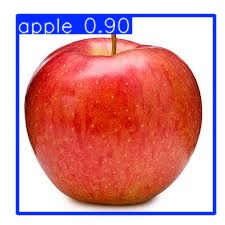

In [38]:
from IPython.display import Image, display
import os

output_folder = "runs/train/mango_apple_detector22"
# Look for image files in the prediction directory
for file in os.listdir(output_folder):
    if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith(".png"):
        display(Image(filename=os.path.join(output_folder, file)))


# Download Model

In [45]:
from google.colab import files
# files.download('runs/detect/train/weights/best.pt')
files.download('/content/runs/train/mango_apple_detector2/weights/best.pt')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Bonus:** If you want to do prediction using your trained saved model follow these steps:

Install YOLOv8 (if not already)

In [42]:
# !pip install -q ultralytics

Load Your Model

In [67]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("runs/train/mango_apple_detector2/weights/best.pt")


Or if you uploaded the .pt file from your system:

In [68]:
# from google.colab import files
# uploaded = files.upload()  # Then choose your `best.pt` file

# Now load it
# model = YOLO("best.pt")


Run Inference on an Image

In [65]:
results = model.predict(source="mango.png", conf=0.5, save=True)



image 1/1 /content/mango.png: 416x416 1 mango, 8.0ms
Speed: 2.5ms preprocess, 8.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict2


View the Prediction Output

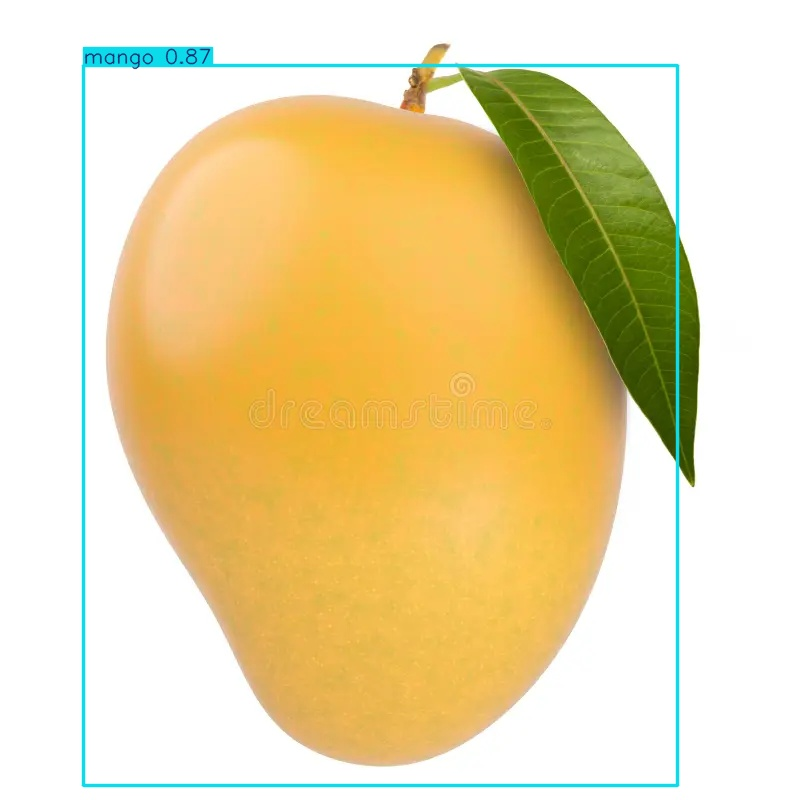

In [66]:
import os
from IPython.display import Image, display

image_path = "runs/detect/predict2/mango.jpg"

if os.path.exists(image_path):
    display(Image(filename=image_path))
else:
    print("Image not found:", image_path)


# Exercise ToDo



---

## **Simple Object Detection Ideas (for 10–20 images per class)**

These pairs work well because they are:

* Visually distinct
* Easy to photograph or download
* Easy to annotate with bounding boxes
* Real-world relevant for small projects or demos

---

### 🍫 1. **Pen vs Eraser**

* Very different shapes and colors
* You can collect them easily
* Great for a “stationery item” detector

---

### 🍽 2. **Spoon vs Fork**

* Common kitchen objects
* Easy to photograph
* Good to teach fine shape differences

---

### 🎧 3. **Headphones vs Charger**

* Useful for distinguishing electronic accessories
* Can be used for object sorters

---

### 🕶 4. **Glasses vs Watch**

* Useful for wearable detection projects
* Clearly different geometry

---

### 🖐️ 5. **Hand vs Fist** (open hand vs closed hand)

* Interesting for gesture detection
* Good intro to pose-aware bounding box models

---

### 📱 6. **Mobile Phone vs Remote Control**

* Look similar — good for learning fine classification
* Good for object confusion experiments

---

### 🪑 7. **Chair vs Table Corner**

* Good for learning furniture detection (room AI)
* May require consistent angles

---

### 🧴 8. **Bottle vs Can**

* Use water bottle vs Coke/Pepsi can
* Easy to collect and annotate

---

### 🧠 Bonus: Use Common Dataset Subsets

You can also grab a few images from larger public datasets like:

* **Google Open Images**
* **Roboflow datasets**
* **Kaggle** subsets

---

## 🧰 Tools You Already Know

| Task       | Tool                                   |
| ---------- | -------------------------------------- |
| Annotation | `LabelImg` (Pascal VOC XML)            |
| Conversion | Python script to YOLO format           |
| Training   | YOLOv8 via Ultralytics                 |
| Platform   | Google Colab                           |
| Testing    | `model.predict(...)` and `results.png` |

---

## 📝 Steps to Follow (Same as Apple/Mango)

1. Collect 5–10 images each of **your new classes**
2. Annotate each using **LabelImg** with bounding boxes
3. Convert Pascal VOC XML to YOLO format
4. Organize into:

   ```
   YOLO_dataset/
   ├── images/train/
   ├── labels/train/
   └── data.yaml
   ```
5. Train with transfer learning:

   ```python
   model = YOLO("yolov8n.pt")
   model.train(data="YOLO_dataset/data.yaml", epochs=100, imgsz=416)
   ```
6. Test with `model.predict(...)`

---

## 🧪 Want to Try Something Fun?

If you want to teach students or create demos:

* **Banana vs Orange** 🍌🍊
* **Mask vs No Mask** 😷❌
* **Thumbs Up vs Thumbs Down** 👍👎
* **Open Book vs Closed Book** 📖📕
* **Keyboard vs Mouse**

All of these work with <10 images per class for basic demos.

---


